# bank churn

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# ✅ 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# ✅ 마이너스(-) 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [13]:
bank_df = pd.read_csv('C:\\2nd_project_new\\SKN11-2nd-5Team\\data\\BankChurners.csv')
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [14]:
bank_df_drop = bank_df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
bank_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

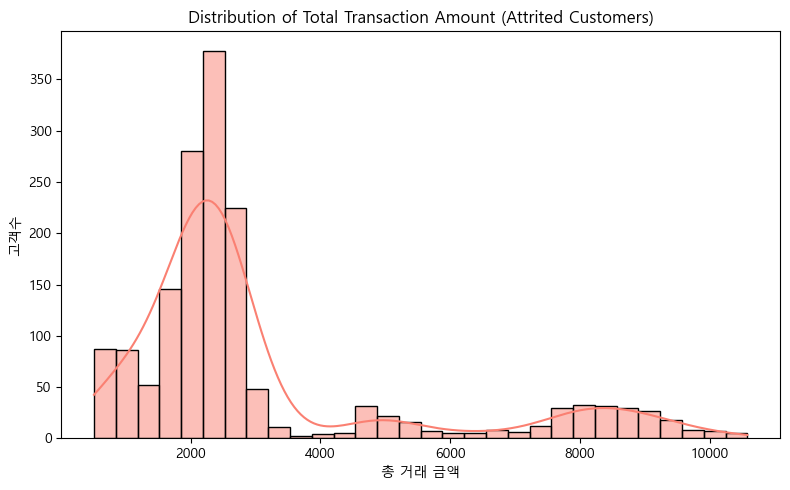

In [15]:
# Total_Trans_Amt vs. Attrition_Flag

df_churned = bank_df[bank_df['Attrition_Flag'] == 'Attrited Customer']

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_churned,
    x='Total_Trans_Amt',
    bins=30,
    kde=True,           # 커널 밀도 추정선 표시
    color='salmon'
)

plt.title('Distribution of Total Transaction Amount (Attrited Customers)')
plt.xlabel('총 거래 금액')
plt.ylabel('고객수')
plt.tight_layout()
plt.show()

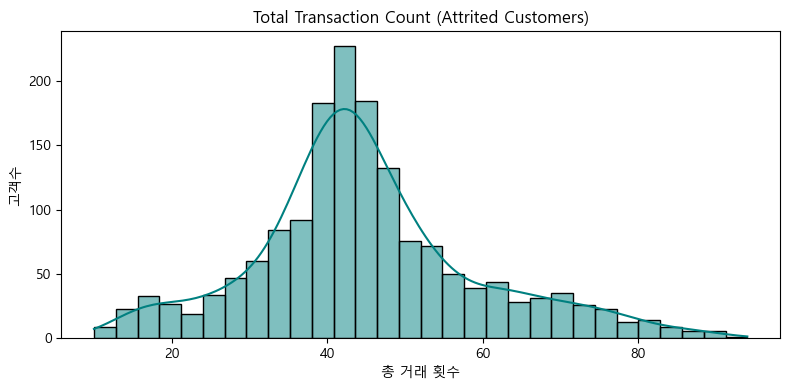

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_churned, x='Total_Trans_Ct', bins=30, kde=True, color='teal')
plt.title('Total Transaction Count (Attrited Customers)')
plt.xlabel('총 거래 횟수')
plt.ylabel('고객수')
plt.tight_layout()
plt.show()

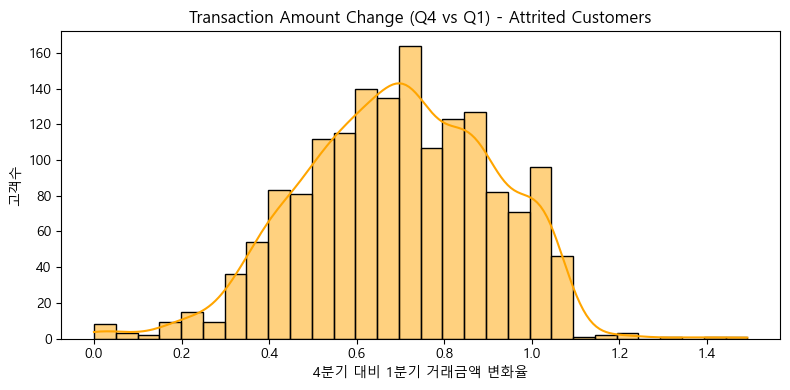

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_churned, x='Total_Amt_Chng_Q4_Q1', bins=30, kde=True, color='orange')
plt.title('Transaction Amount Change (Q4 vs Q1) - Attrited Customers')
plt.xlabel('4분기 대비 1분기 거래금액 변화율')
plt.ylabel('고객수')
plt.tight_layout()
plt.show()

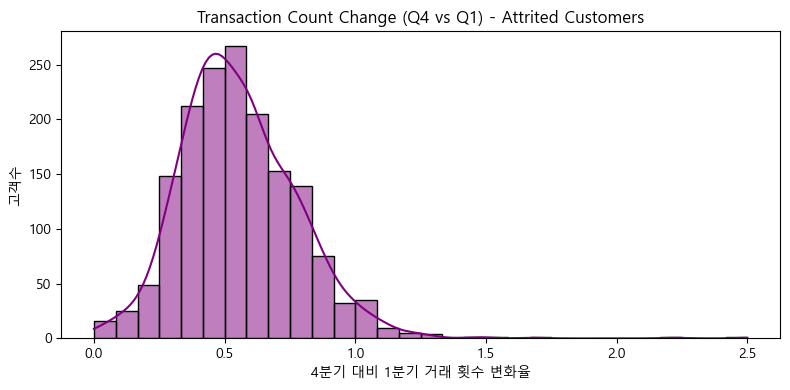

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df_churned, x='Total_Ct_Chng_Q4_Q1', bins=30, kde=True, color='purple')
plt.title('Transaction Count Change (Q4 vs Q1) - Attrited Customers')
plt.xlabel('4분기 대비 1분기 거래 횟수 변화율')
plt.ylabel('고객수')
plt.tight_layout()
plt.show()


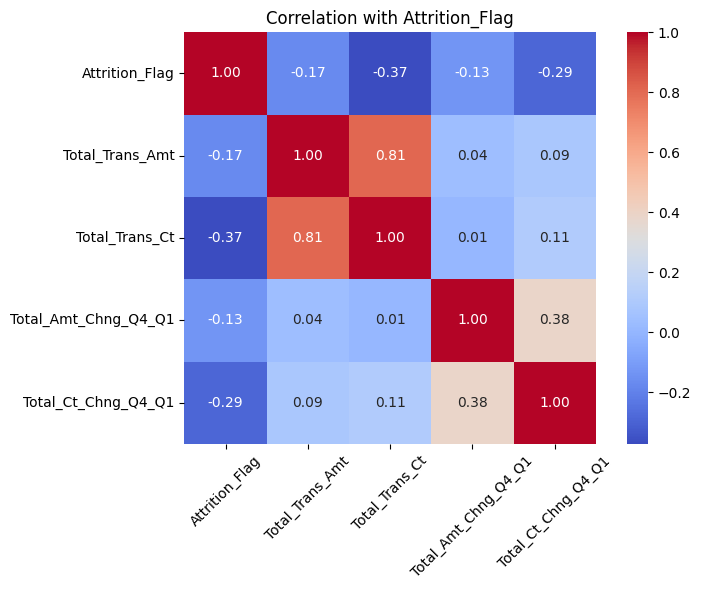

In [77]:
# 사용할 컬럼만 추출 (복사)
corr_df = bank_df[['Attrition_Flag', 'Total_Trans_Amt', 'Total_Trans_Ct', 
              'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']].copy()

# Attrition_Flag를 숫자형으로 변환 ('Attrited Customer' → 1, 'Existing Customer' → 0)
corr_df['Attrition_Flag'] = corr_df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

# 수치형으로 강제 변환 (혹시 모를 object 컬럼 대비)
for col in corr_df.columns:
    corr_df[col] = pd.to_numeric(corr_df[col], errors='coerce')

# 결측치 제거
corr_df = corr_df.dropna()

# 상관계수 계산
corr_matrix = corr_df.corr()

# 시각화 - heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation with Attrition_Flag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19276\2323756992.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_ratio = ratio_df.groupby('bin_label')['Attrition_Flag'].mean().reset_index(name='Churn_Rate')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19276\2323756992.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_ratio, x='bin_label', y='Churn_Rate', ax=ax, palette='Set2')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19276\2323756992.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=Tru

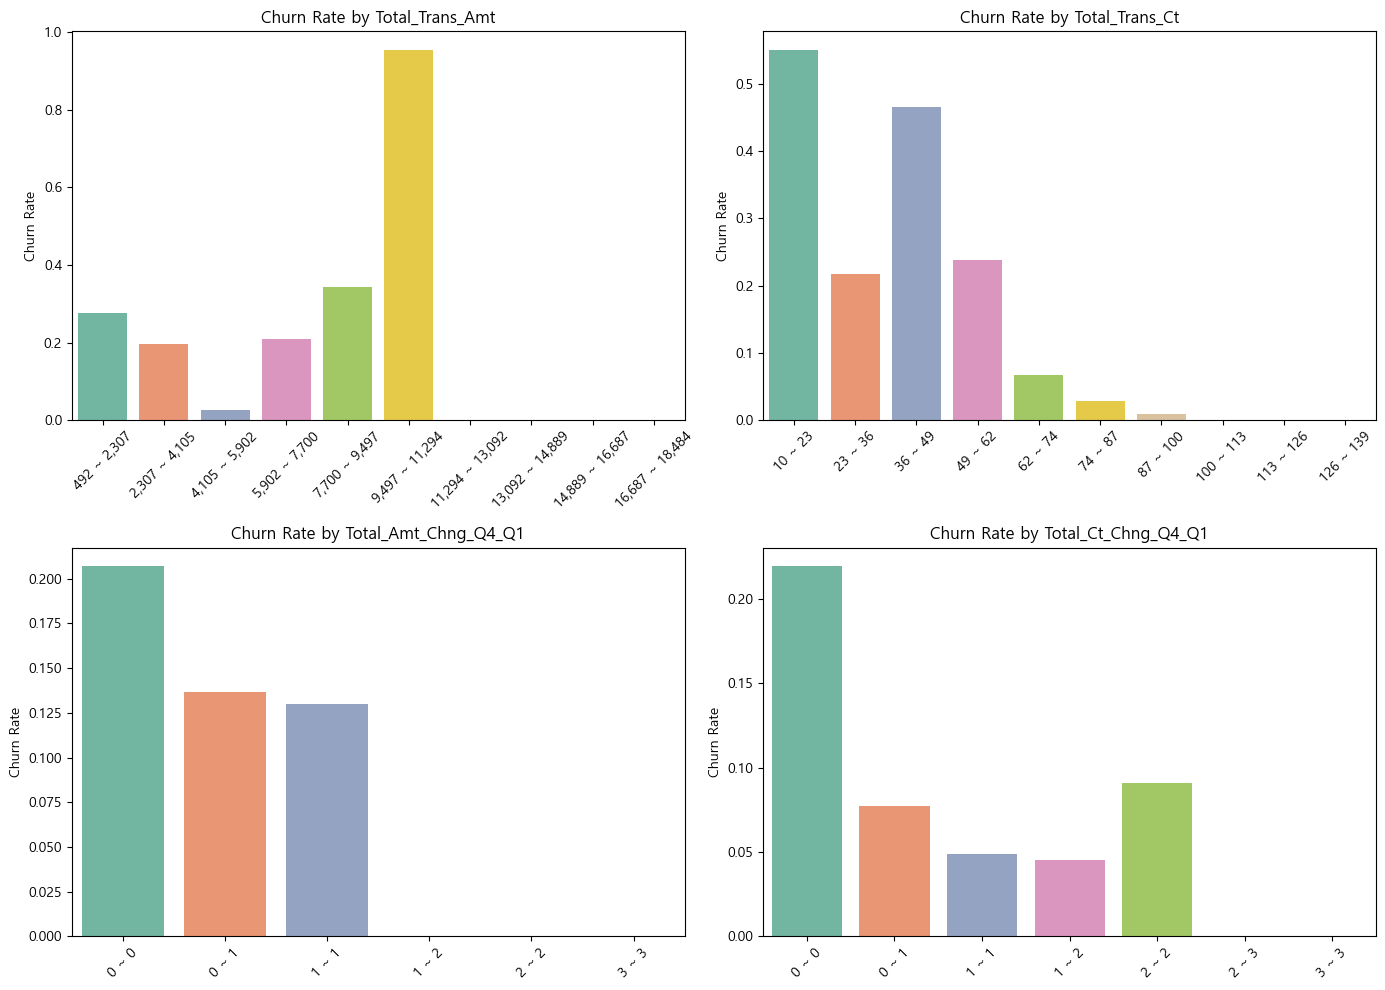

In [20]:
df = pd.read_csv('C:\\2nd_project_new\\SKN11-2nd-5Team\\data\\BankChurners.csv')

# 필요한 열 추출 및 복사
ratio_df = df[['Attrition_Flag', 'Total_Trans_Amt', 'Total_Trans_Ct',
               'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']].copy()

# 수치형 변환 및 결측치 제거
for col in ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']:
    ratio_df[col] = pd.to_numeric(ratio_df[col], errors='coerce')
ratio_df = ratio_df.dropna()

# 이탈 여부 수치형으로 변환
ratio_df['Attrition_Flag'] = ratio_df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# 시각화 시작
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']
bins = 10  # 동일한 간격의 구간 수

for ax, feature in zip(axs.flat, features):
    # 등간격으로 구간 나누기 (precision=0으로 소수점 제거)
    ratio_df['bin'] = pd.cut(ratio_df[feature], bins=bins, precision=0)

    # 보기 좋게 레이블 정제
    ratio_df['bin_label'] = ratio_df['bin'].apply(lambda x: f"{int(x.left):,} ~ {int(x.right):,}")

    # 이탈률 계산
    churn_ratio = ratio_df.groupby('bin_label')['Attrition_Flag'].mean().reset_index(name='Churn_Rate')

    # 바 차트 시각화
    sns.barplot(data=churn_ratio, x='bin_label', y='Churn_Rate', ax=ax, palette='Set2')
    ax.set_title(f'Churn Rate by {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Churn Rate')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19276\3744017608.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_count = ratio_df[ratio_df['Attrition_Flag'] == 1].groupby('bin_label').size().reset_index(name='Churn_Count')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19276\3744017608.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_count, x='bin_label', y='Churn_Count', ax=ax, palette='Set2')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19276\3744017608.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavio

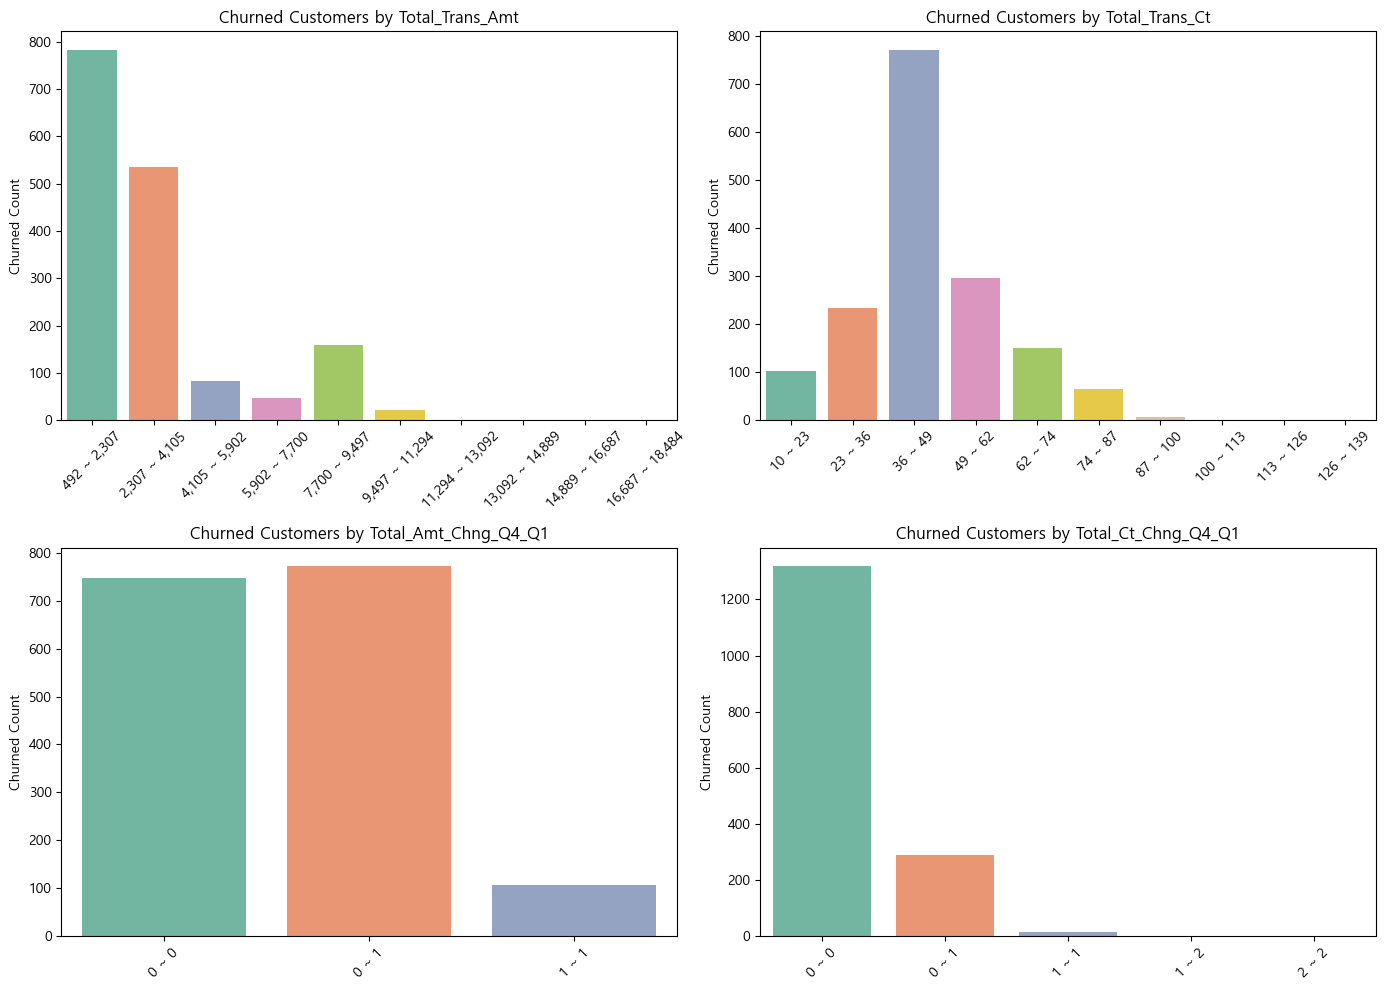

In [ ]:
# 시각화 시작
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']
bins = 10  # 동일한 간격의 구간 수

for ax, feature in zip(axs.flat, features):
    # 등간격으로 구간 나누기
    ratio_df['bin'] = pd.cut(ratio_df[feature], bins=bins, precision=0)
    ratio_df['bin_label'] = ratio_df['bin'].apply(lambda x: f"{int(x.left):,} ~ {int(x.right):,}")

    # ✅ 이탈 고객 수 계산
    churn_count = ratio_df[ratio_df['Attrition_Flag'] == 1].groupby('bin_label').size().reset_index(name='Churn_Count')

    # 바 차트 시각화
    sns.barplot(data=churn_count, x='bin_label', y='Churn_Count', ax=ax, palette='Set2')
    ax.set_title(f'Churned Customers by {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Churned Count')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_19368\3798388120.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_ratio = ratio_df.groupby('bin')['Attrition_Flag'].apply(
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19368\3798388120.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_ratio, x='bin', y='Churn_Rate', ax=ax, palette='Set2')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_19368\3798388120.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence t

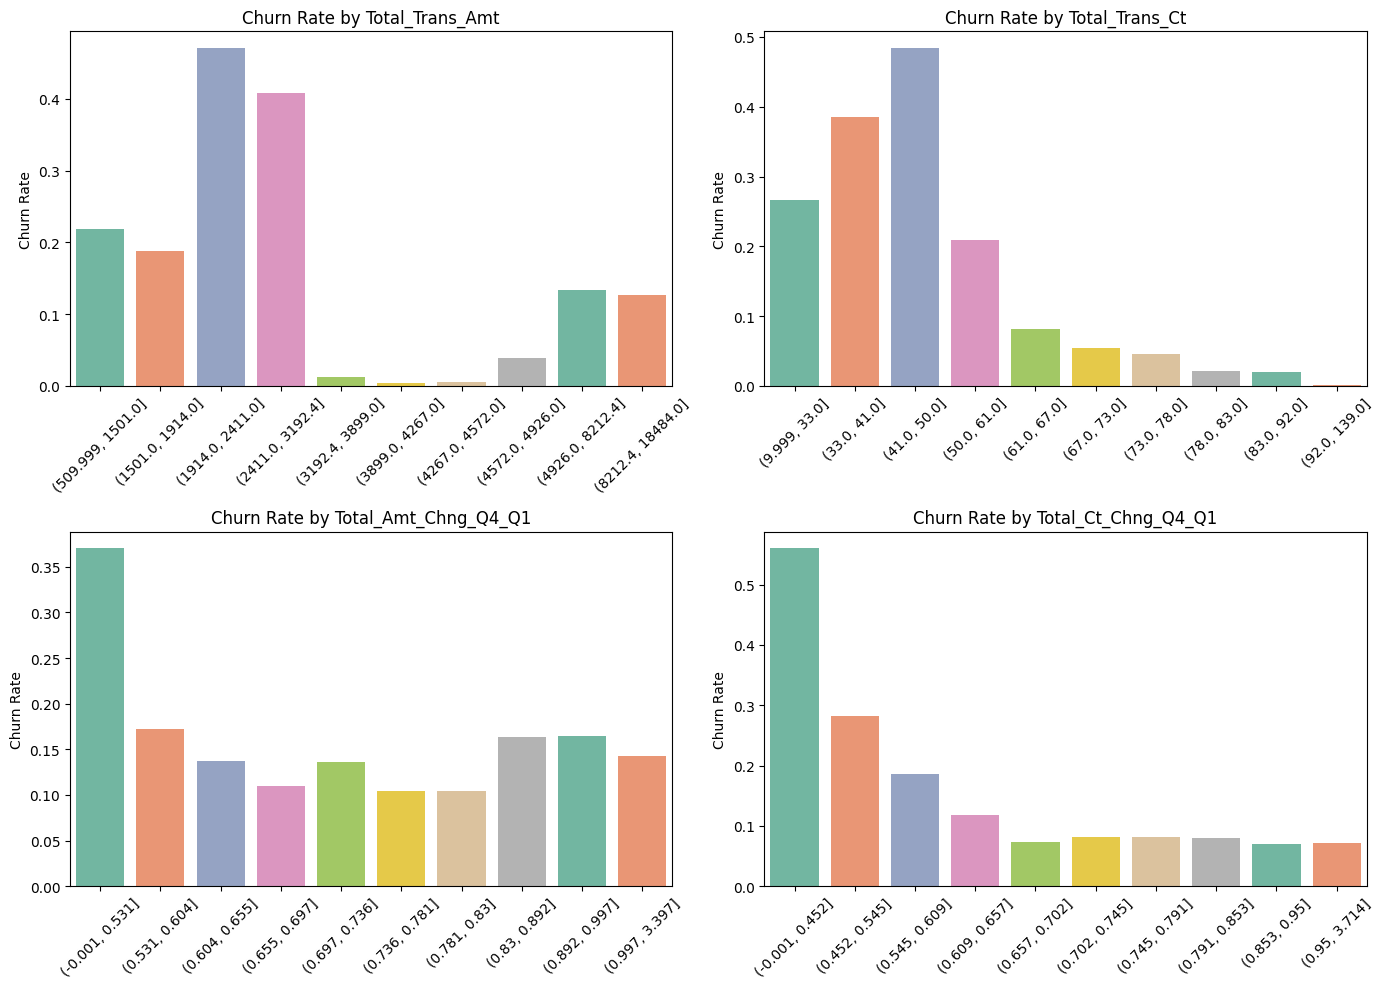

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 필요한 열 추출
ratio_df = bank_df[['Attrition_Flag', 'Total_Trans_Amt', 'Total_Trans_Ct', 
               'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']].copy()

# 2. 수치형 변환 및 결측치 제거
for col in ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']:
    ratio_df[col] = pd.to_numeric(ratio_df[col], errors='coerce')
ratio_df = ratio_df.dropna()

# 3. 시각화: 구간별 이탈률 (Churn Rate)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

features = ['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']
bins = 10  # qcut 구간 수

for ax, feature in zip(axs.flat, features):
    # 구간 나누기 (동일 개수로)
    ratio_df['bin'] = pd.qcut(ratio_df[feature], q=bins, duplicates='drop')

    # 각 구간에서 이탈 비율 계산
    churn_ratio = ratio_df.groupby('bin')['Attrition_Flag'].apply(
        lambda x: (x == 'Attrited Customer').mean()).reset_index(name='Churn_Rate')

    # 바그래프 시각화
    sns.barplot(data=churn_ratio, x='bin', y='Churn_Rate', ax=ax, palette='Set2')
    ax.set_title(f'Churn Rate by {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('Churn Rate')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


- 유지 고객과 이탈 고객을 나눠서 구간별로 비교

In [25]:
churned = bank_df[bank_df['Attrition_Flag']=='Attrited Customer']
stayed = bank_df[bank_df['Attrition_Flag']=='Existing Customer']

stayed.count()
churned.count()

CLIENTNUM                                                                                                                             1627
Attrition_Flag                                                                                                                        1627
Customer_Age                                                                                                                          1627
Gender                                                                                                                                1627
Dependent_count                                                                                                                       1627
Education_Level                                                                                                                       1627
Marital_Status                                                                                                                        1627
Income_Category            

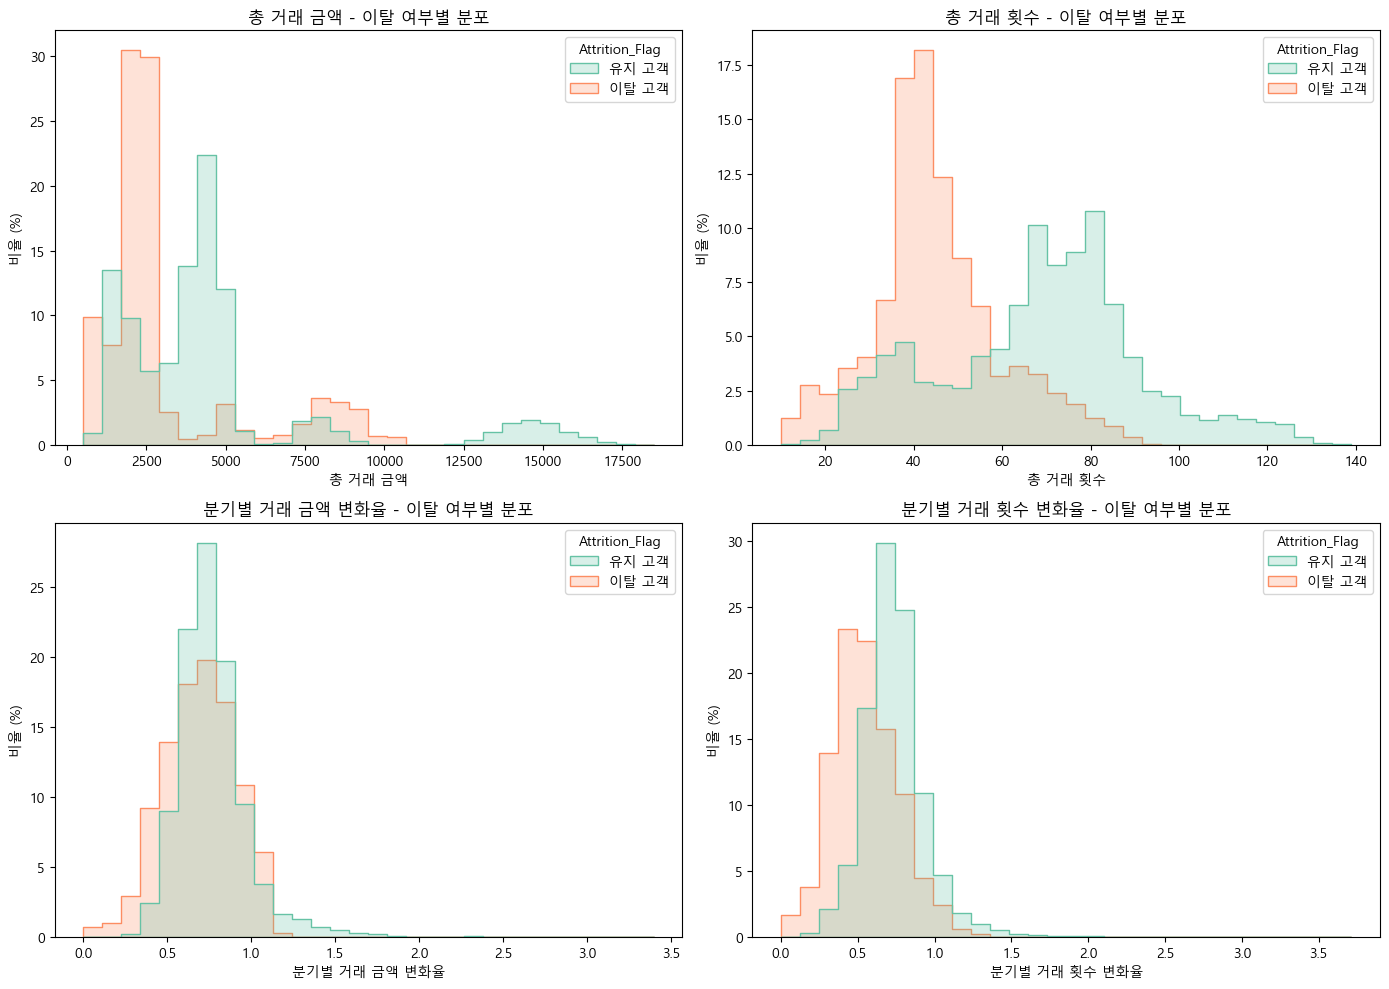

In [27]:
# 데이터 로드
df = pd.read_csv('C:\\2nd_project_new\\SKN11-2nd-5Team\\data\\BankChurners.csv')

# 타겟 변수 숫자로 변환 (선택적)
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': '유지 고객',
    'Attrited Customer': '이탈 고객'
})

# 변수 매핑: 영어 → 한글
feature_map = {
    'Total_Trans_Amt': '총 거래 금액',
    'Total_Trans_Ct': '총 거래 횟수',
    'Total_Amt_Chng_Q4_Q1': '분기별 거래 금액 변화율',
    'Total_Ct_Chng_Q4_Q1': '분기별 거래 횟수 변화율'
}

features = list(feature_map.keys())

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for ax, feature in zip(axs.flat, features):
    sns.histplot(
        data=df,
        x=feature,
        hue='Attrition_Flag',
        stat='percent',
        common_norm=False,
        bins=30,
        element='step',
        palette='Set2',
        ax=ax
    )
    ax.set_title(f"{feature_map[feature]} - 이탈 여부별 분포")
    ax.set_xlabel(feature_map[feature])
    ax.set_ylabel('비율 (%)')

plt.tight_layout()
plt.show()